In [1]:
import torch
import numpy as np

In [2]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [20]:
import matplotlib.pyplot as plt

In [24]:
def plot_(x, y, color):
    plt.plot(x, y, color)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [4]:
func_ = lambda x : np.exp(x)

In [45]:
batch_time = 10
data_size = 2000
batch_size = 20

In [46]:
true_y0 = torch.tensor(func_(0))
t = torch.linspace(0., 5., data_size)

In [47]:
true_y = func_(t)

In [48]:
t.shape, true_y.shape

(torch.Size([2000]), torch.Size([2000]))

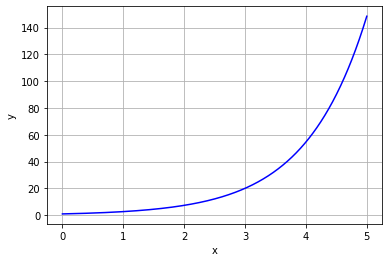

In [28]:
plot_(t, true_y, 'b')

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(nn.Linear(1, 50), 
                                nn.Tanh(), 
                                nn.Linear(50, 50), 
                                nn.Tanh(), 
                                nn.Linear(50, 1)
                               )
    def forward(self, x):
        return self.net(x)

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
net = Net().to(device)
loss_fn = torch.nn.MSELoss(reduction='mean').to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [39]:
def ode_e_x(x, net):
    y = net(x)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(net(x)), create_graph=True)[0]
    return y-dy_dx

In [57]:
plt.ion()
epochs = 50000

0 Train Loss: tensor(0.2790, device='cuda:0')
times 0 - loss: 0.2789570987224579 - y_0: tensor([[0.7092],
        [0.7092],
        [0.7092],
        ...,
        [0.7092],
        [0.7092],
        [0.7092]], device='cuda:0', grad_fn=<AddmmBackward0>)


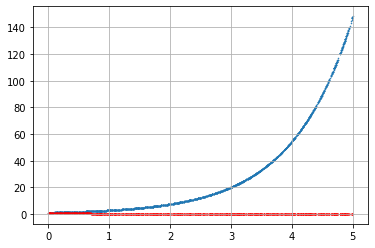

500 Train Loss: tensor(0.2759, device='cuda:0')
times 500 - loss: 0.2758947014808655 - y_0: tensor([[0.7155],
        [0.7155],
        [0.7155],
        ...,
        [0.7155],
        [0.7155],
        [0.7155]], device='cuda:0', grad_fn=<AddmmBackward0>)


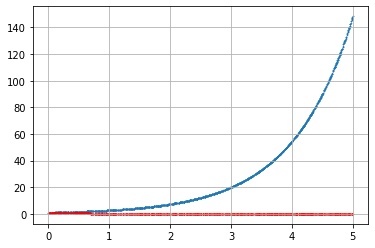

1000 Train Loss: tensor(0.2766, device='cuda:0')
times 1000 - loss: 0.2765878438949585 - y_0: tensor([[0.7134],
        [0.7134],
        [0.7134],
        ...,
        [0.7134],
        [0.7134],
        [0.7134]], device='cuda:0', grad_fn=<AddmmBackward0>)


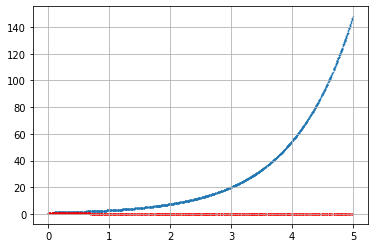

1500 Train Loss: tensor(0.2878, device='cuda:0')
times 1500 - loss: 0.2877904176712036 - y_0: tensor([[0.7150],
        [0.7150],
        [0.7150],
        ...,
        [0.7150],
        [0.7150],
        [0.7150]], device='cuda:0', grad_fn=<AddmmBackward0>)


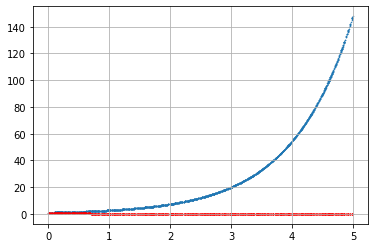

2000 Train Loss: tensor(0.2885, device='cuda:0')
times 2000 - loss: 0.2884800434112549 - y_0: tensor([[0.7139],
        [0.7139],
        [0.7139],
        ...,
        [0.7139],
        [0.7139],
        [0.7139]], device='cuda:0', grad_fn=<AddmmBackward0>)


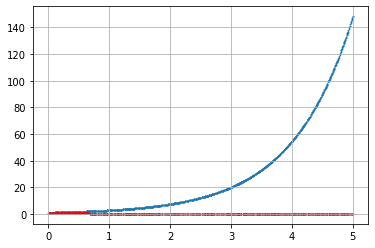

2500 Train Loss: tensor(0.2933, device='cuda:0')
times 2500 - loss: 0.293265700340271 - y_0: tensor([[0.7050],
        [0.7050],
        [0.7050],
        ...,
        [0.7050],
        [0.7050],
        [0.7050]], device='cuda:0', grad_fn=<AddmmBackward0>)


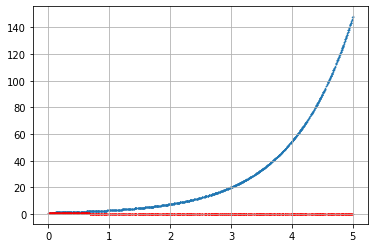

3000 Train Loss: tensor(0.2951, device='cuda:0')
times 3000 - loss: 0.295100599527359 - y_0: tensor([[0.7097],
        [0.7097],
        [0.7097],
        ...,
        [0.7097],
        [0.7097],
        [0.7097]], device='cuda:0', grad_fn=<AddmmBackward0>)


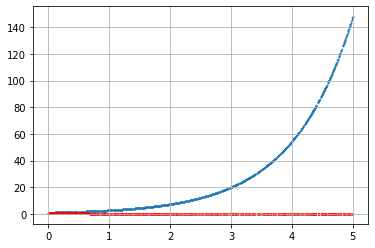

3500 Train Loss: tensor(0.2631, device='cuda:0')
times 3500 - loss: 0.26311278343200684 - y_0: tensor([[0.7141],
        [0.7141],
        [0.7141],
        ...,
        [0.7141],
        [0.7141],
        [0.7141]], device='cuda:0', grad_fn=<AddmmBackward0>)


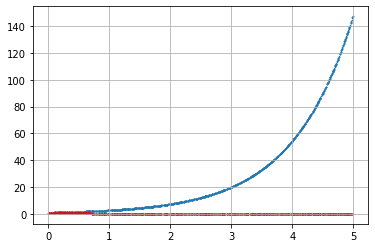

4000 Train Loss: tensor(0.2805, device='cuda:0')
times 4000 - loss: 0.2805059552192688 - y_0: tensor([[0.7138],
        [0.7138],
        [0.7138],
        ...,
        [0.7138],
        [0.7138],
        [0.7138]], device='cuda:0', grad_fn=<AddmmBackward0>)


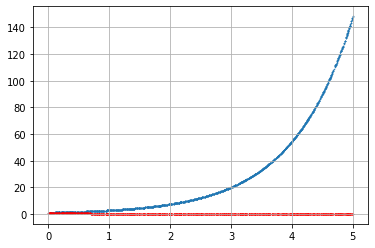

4500 Train Loss: tensor(0.2747, device='cuda:0')
times 4500 - loss: 0.2746856212615967 - y_0: tensor([[0.7131],
        [0.7131],
        [0.7131],
        ...,
        [0.7131],
        [0.7131],
        [0.7131]], device='cuda:0', grad_fn=<AddmmBackward0>)


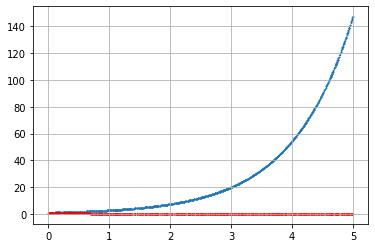

5000 Train Loss: tensor(0.2862, device='cuda:0')
times 5000 - loss: 0.2862471044063568 - y_0: tensor([[0.7153],
        [0.7153],
        [0.7153],
        ...,
        [0.7153],
        [0.7153],
        [0.7153]], device='cuda:0', grad_fn=<AddmmBackward0>)


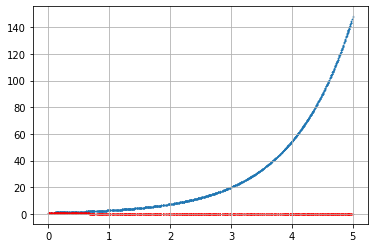

5500 Train Loss: tensor(0.2919, device='cuda:0')
times 5500 - loss: 0.2919166386127472 - y_0: tensor([[0.7111],
        [0.7111],
        [0.7111],
        ...,
        [0.7111],
        [0.7111],
        [0.7111]], device='cuda:0', grad_fn=<AddmmBackward0>)


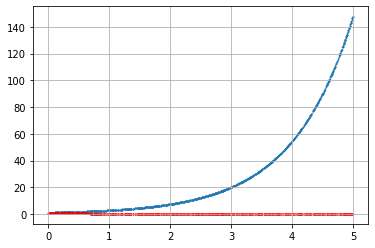

6000 Train Loss: tensor(0.2796, device='cuda:0')
times 6000 - loss: 0.2795712351799011 - y_0: tensor([[0.7170],
        [0.7170],
        [0.7170],
        ...,
        [0.7170],
        [0.7170],
        [0.7170]], device='cuda:0', grad_fn=<AddmmBackward0>)


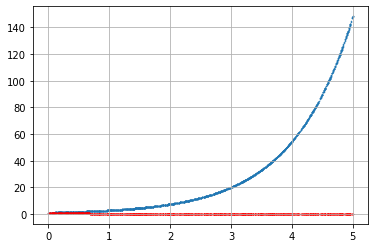

6500 Train Loss: tensor(0.2811, device='cuda:0')
times 6500 - loss: 0.28114384412765503 - y_0: tensor([[0.7063],
        [0.7063],
        [0.7063],
        ...,
        [0.7063],
        [0.7063],
        [0.7063]], device='cuda:0', grad_fn=<AddmmBackward0>)


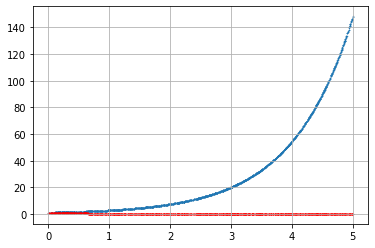

7000 Train Loss: tensor(0.2932, device='cuda:0')
times 7000 - loss: 0.2932409346103668 - y_0: tensor([[0.7082],
        [0.7082],
        [0.7082],
        ...,
        [0.7082],
        [0.7082],
        [0.7082]], device='cuda:0', grad_fn=<AddmmBackward0>)


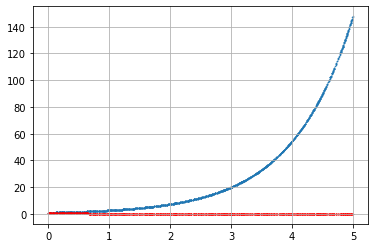

7500 Train Loss: tensor(0.2988, device='cuda:0')
times 7500 - loss: 0.2988465428352356 - y_0: tensor([[0.7142],
        [0.7142],
        [0.7142],
        ...,
        [0.7142],
        [0.7142],
        [0.7142]], device='cuda:0', grad_fn=<AddmmBackward0>)


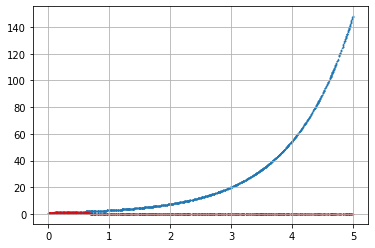

8000 Train Loss: tensor(0.2940, device='cuda:0')
times 8000 - loss: 0.2939925491809845 - y_0: tensor([[0.7201],
        [0.7201],
        [0.7201],
        ...,
        [0.7201],
        [0.7201],
        [0.7201]], device='cuda:0', grad_fn=<AddmmBackward0>)


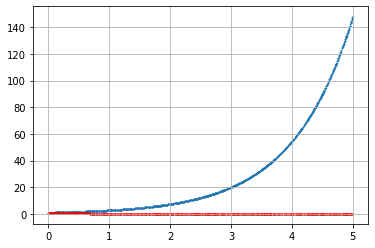

8500 Train Loss: tensor(0.2955, device='cuda:0')
times 8500 - loss: 0.29548606276512146 - y_0: tensor([[0.7191],
        [0.7191],
        [0.7191],
        ...,
        [0.7191],
        [0.7191],
        [0.7191]], device='cuda:0', grad_fn=<AddmmBackward0>)


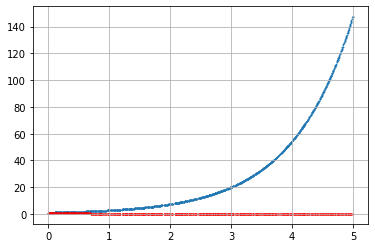

9000 Train Loss: tensor(0.2842, device='cuda:0')
times 9000 - loss: 0.28423595428466797 - y_0: tensor([[0.7092],
        [0.7092],
        [0.7092],
        ...,
        [0.7092],
        [0.7092],
        [0.7092]], device='cuda:0', grad_fn=<AddmmBackward0>)


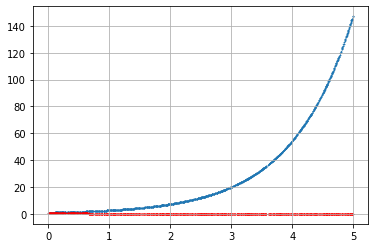

9500 Train Loss: tensor(0.2891, device='cuda:0')
times 9500 - loss: 0.28905853629112244 - y_0: tensor([[0.7050],
        [0.7050],
        [0.7050],
        ...,
        [0.7050],
        [0.7050],
        [0.7050]], device='cuda:0', grad_fn=<AddmmBackward0>)


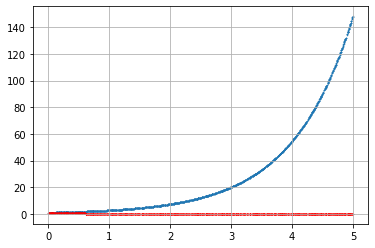

10000 Train Loss: tensor(0.2839, device='cuda:0')
times 10000 - loss: 0.2838861346244812 - y_0: tensor([[0.7115],
        [0.7115],
        [0.7115],
        ...,
        [0.7115],
        [0.7115],
        [0.7115]], device='cuda:0', grad_fn=<AddmmBackward0>)


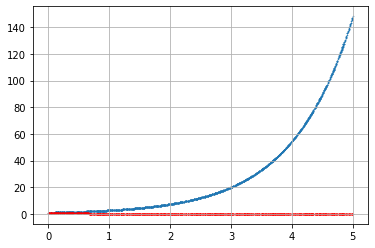

10500 Train Loss: tensor(0.2687, device='cuda:0')
times 10500 - loss: 0.268661767244339 - y_0: tensor([[0.7146],
        [0.7146],
        [0.7146],
        ...,
        [0.7146],
        [0.7146],
        [0.7146]], device='cuda:0', grad_fn=<AddmmBackward0>)


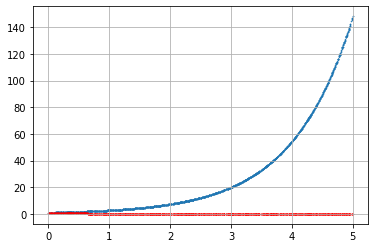

11000 Train Loss: tensor(0.2862, device='cuda:0')
times 11000 - loss: 0.2862071394920349 - y_0: tensor([[0.7158],
        [0.7158],
        [0.7158],
        ...,
        [0.7158],
        [0.7158],
        [0.7158]], device='cuda:0', grad_fn=<AddmmBackward0>)


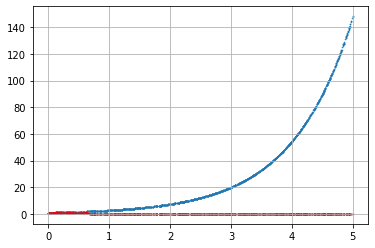

11500 Train Loss: tensor(0.2768, device='cuda:0')
times 11500 - loss: 0.2767590284347534 - y_0: tensor([[0.7239],
        [0.7239],
        [0.7239],
        ...,
        [0.7239],
        [0.7239],
        [0.7239]], device='cuda:0', grad_fn=<AddmmBackward0>)


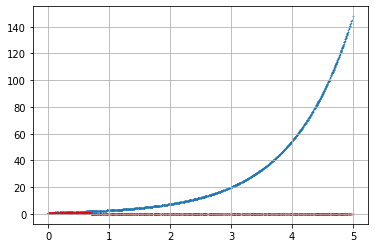

12000 Train Loss: tensor(0.2851, device='cuda:0')
times 12000 - loss: 0.28510189056396484 - y_0: tensor([[0.7046],
        [0.7046],
        [0.7046],
        ...,
        [0.7046],
        [0.7046],
        [0.7046]], device='cuda:0', grad_fn=<AddmmBackward0>)


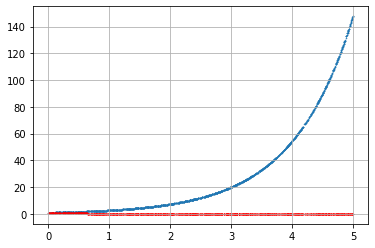

12500 Train Loss: tensor(0.2714, device='cuda:0')
times 12500 - loss: 0.2713854908943176 - y_0: tensor([[0.7182],
        [0.7182],
        [0.7182],
        ...,
        [0.7182],
        [0.7182],
        [0.7182]], device='cuda:0', grad_fn=<AddmmBackward0>)


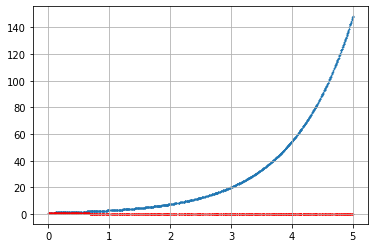

13000 Train Loss: tensor(0.2906, device='cuda:0')
times 13000 - loss: 0.2905724048614502 - y_0: tensor([[0.7204],
        [0.7204],
        [0.7204],
        ...,
        [0.7204],
        [0.7204],
        [0.7204]], device='cuda:0', grad_fn=<AddmmBackward0>)


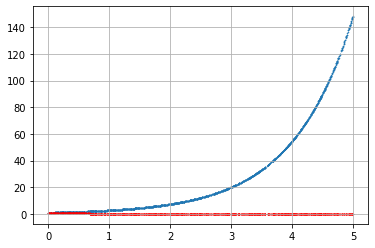

13500 Train Loss: tensor(0.2668, device='cuda:0')
times 13500 - loss: 0.2668154537677765 - y_0: tensor([[0.7123],
        [0.7123],
        [0.7123],
        ...,
        [0.7123],
        [0.7123],
        [0.7123]], device='cuda:0', grad_fn=<AddmmBackward0>)


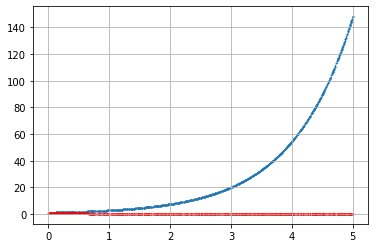

14000 Train Loss: tensor(0.2791, device='cuda:0')
times 14000 - loss: 0.27912747859954834 - y_0: tensor([[0.7125],
        [0.7125],
        [0.7125],
        ...,
        [0.7125],
        [0.7125],
        [0.7125]], device='cuda:0', grad_fn=<AddmmBackward0>)


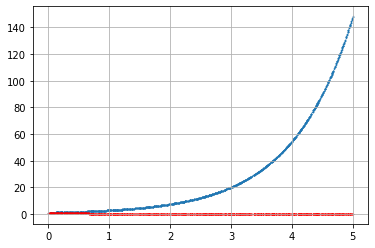

14500 Train Loss: tensor(0.2857, device='cuda:0')
times 14500 - loss: 0.28566235303878784 - y_0: tensor([[0.7049],
        [0.7049],
        [0.7049],
        ...,
        [0.7049],
        [0.7049],
        [0.7049]], device='cuda:0', grad_fn=<AddmmBackward0>)


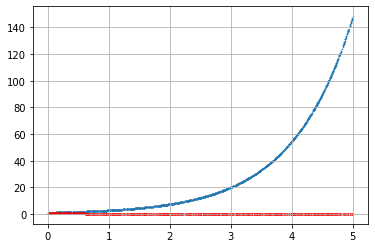

15000 Train Loss: tensor(0.2953, device='cuda:0')
times 15000 - loss: 0.29534584283828735 - y_0: tensor([[0.7051],
        [0.7051],
        [0.7051],
        ...,
        [0.7051],
        [0.7051],
        [0.7051]], device='cuda:0', grad_fn=<AddmmBackward0>)


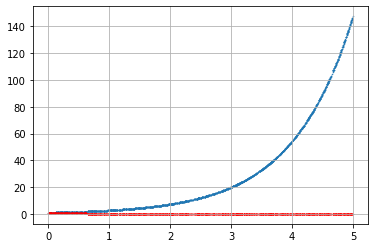

15500 Train Loss: tensor(0.2728, device='cuda:0')
times 15500 - loss: 0.2728070318698883 - y_0: tensor([[0.7215],
        [0.7215],
        [0.7215],
        ...,
        [0.7215],
        [0.7215],
        [0.7215]], device='cuda:0', grad_fn=<AddmmBackward0>)


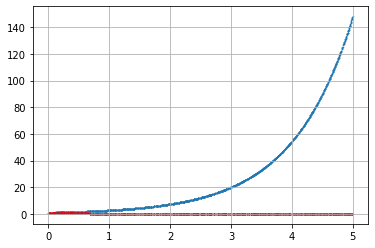

16000 Train Loss: tensor(0.2717, device='cuda:0')
times 16000 - loss: 0.2716774344444275 - y_0: tensor([[0.7166],
        [0.7166],
        [0.7166],
        ...,
        [0.7166],
        [0.7166],
        [0.7166]], device='cuda:0', grad_fn=<AddmmBackward0>)


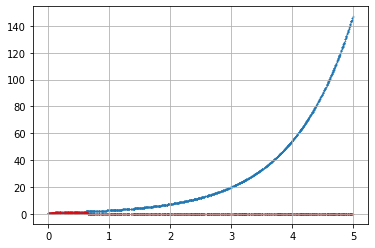

16500 Train Loss: tensor(0.3006, device='cuda:0')
times 16500 - loss: 0.30057278275489807 - y_0: tensor([[0.7111],
        [0.7111],
        [0.7111],
        ...,
        [0.7111],
        [0.7111],
        [0.7111]], device='cuda:0', grad_fn=<AddmmBackward0>)


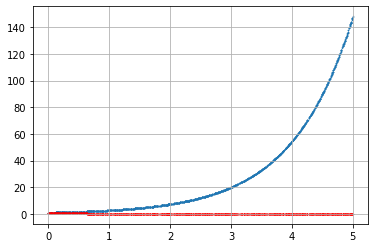

17000 Train Loss: tensor(0.2785, device='cuda:0')
times 17000 - loss: 0.2784847021102905 - y_0: tensor([[0.7214],
        [0.7214],
        [0.7214],
        ...,
        [0.7214],
        [0.7214],
        [0.7214]], device='cuda:0', grad_fn=<AddmmBackward0>)


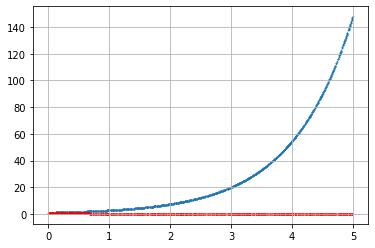

17500 Train Loss: tensor(0.2975, device='cuda:0')
times 17500 - loss: 0.2974703013896942 - y_0: tensor([[0.7088],
        [0.7088],
        [0.7088],
        ...,
        [0.7088],
        [0.7088],
        [0.7088]], device='cuda:0', grad_fn=<AddmmBackward0>)


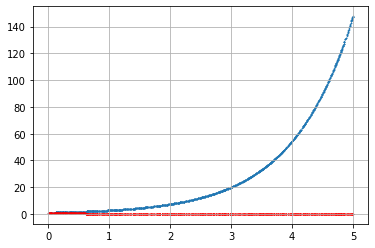

18000 Train Loss: tensor(0.2985, device='cuda:0')
times 18000 - loss: 0.2985260486602783 - y_0: tensor([[0.7069],
        [0.7069],
        [0.7069],
        ...,
        [0.7069],
        [0.7069],
        [0.7069]], device='cuda:0', grad_fn=<AddmmBackward0>)


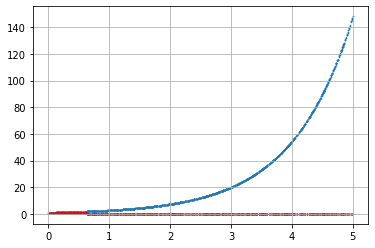

18500 Train Loss: tensor(0.2998, device='cuda:0')
times 18500 - loss: 0.29983073472976685 - y_0: tensor([[0.7169],
        [0.7169],
        [0.7169],
        ...,
        [0.7169],
        [0.7169],
        [0.7169]], device='cuda:0', grad_fn=<AddmmBackward0>)


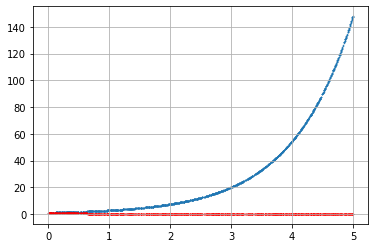

19000 Train Loss: tensor(0.2804, device='cuda:0')
times 19000 - loss: 0.2803642153739929 - y_0: tensor([[0.7104],
        [0.7104],
        [0.7104],
        ...,
        [0.7104],
        [0.7104],
        [0.7104]], device='cuda:0', grad_fn=<AddmmBackward0>)


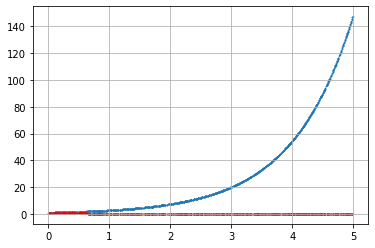

19500 Train Loss: tensor(0.2770, device='cuda:0')
times 19500 - loss: 0.27700555324554443 - y_0: tensor([[0.7057],
        [0.7057],
        [0.7057],
        ...,
        [0.7057],
        [0.7057],
        [0.7057]], device='cuda:0', grad_fn=<AddmmBackward0>)


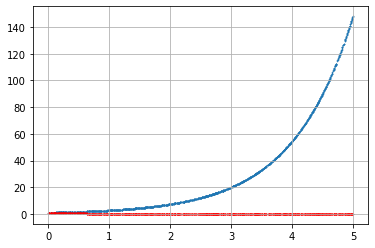

20000 Train Loss: tensor(0.2766, device='cuda:0')
times 20000 - loss: 0.27657341957092285 - y_0: tensor([[0.7174],
        [0.7174],
        [0.7174],
        ...,
        [0.7174],
        [0.7174],
        [0.7174]], device='cuda:0', grad_fn=<AddmmBackward0>)


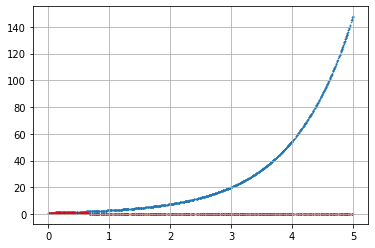

20500 Train Loss: tensor(0.2785, device='cuda:0')
times 20500 - loss: 0.2785443663597107 - y_0: tensor([[0.7129],
        [0.7129],
        [0.7129],
        ...,
        [0.7129],
        [0.7129],
        [0.7129]], device='cuda:0', grad_fn=<AddmmBackward0>)


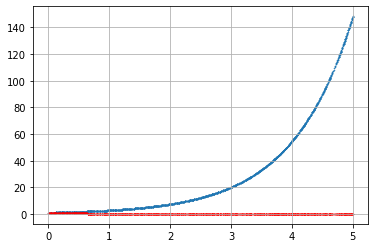

21000 Train Loss: tensor(0.2837, device='cuda:0')
times 21000 - loss: 0.28368017077445984 - y_0: tensor([[0.7202],
        [0.7202],
        [0.7202],
        ...,
        [0.7202],
        [0.7202],
        [0.7202]], device='cuda:0', grad_fn=<AddmmBackward0>)


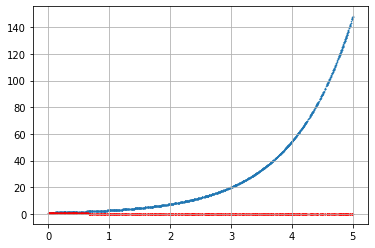

21500 Train Loss: tensor(0.2797, device='cuda:0')
times 21500 - loss: 0.27971503138542175 - y_0: tensor([[0.7120],
        [0.7120],
        [0.7120],
        ...,
        [0.7120],
        [0.7120],
        [0.7120]], device='cuda:0', grad_fn=<AddmmBackward0>)


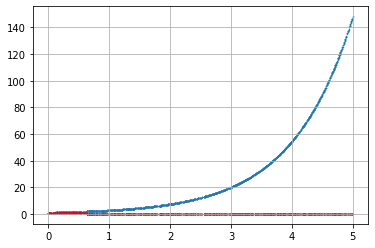

22000 Train Loss: tensor(0.2959, device='cuda:0')
times 22000 - loss: 0.2958835959434509 - y_0: tensor([[0.7219],
        [0.7219],
        [0.7219],
        ...,
        [0.7219],
        [0.7219],
        [0.7219]], device='cuda:0', grad_fn=<AddmmBackward0>)


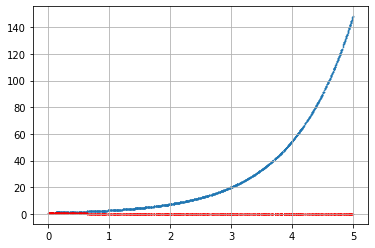

22500 Train Loss: tensor(0.2838, device='cuda:0')
times 22500 - loss: 0.2837716341018677 - y_0: tensor([[0.7133],
        [0.7133],
        [0.7133],
        ...,
        [0.7133],
        [0.7133],
        [0.7133]], device='cuda:0', grad_fn=<AddmmBackward0>)


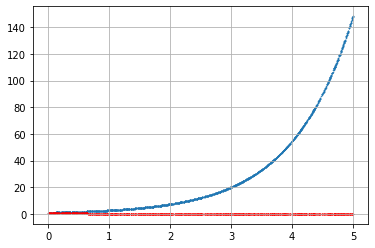

23000 Train Loss: tensor(0.2771, device='cuda:0')
times 23000 - loss: 0.27711933851242065 - y_0: tensor([[0.7142],
        [0.7142],
        [0.7142],
        ...,
        [0.7142],
        [0.7142],
        [0.7142]], device='cuda:0', grad_fn=<AddmmBackward0>)


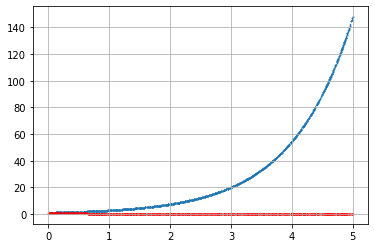

23500 Train Loss: tensor(0.2915, device='cuda:0')
times 23500 - loss: 0.2915169894695282 - y_0: tensor([[0.7085],
        [0.7085],
        [0.7085],
        ...,
        [0.7085],
        [0.7085],
        [0.7085]], device='cuda:0', grad_fn=<AddmmBackward0>)


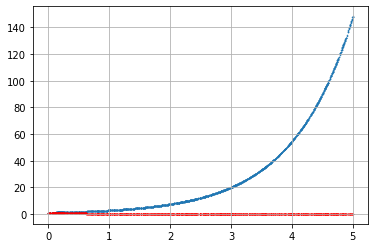

24000 Train Loss: tensor(0.2905, device='cuda:0')
times 24000 - loss: 0.2905029356479645 - y_0: tensor([[0.7149],
        [0.7149],
        [0.7149],
        ...,
        [0.7149],
        [0.7149],
        [0.7149]], device='cuda:0', grad_fn=<AddmmBackward0>)


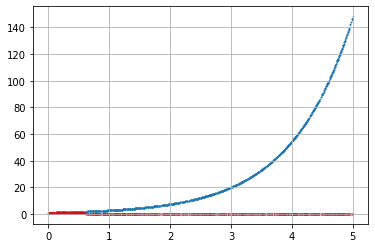

24500 Train Loss: tensor(0.2703, device='cuda:0')
times 24500 - loss: 0.27027109265327454 - y_0: tensor([[0.7154],
        [0.7154],
        [0.7154],
        ...,
        [0.7154],
        [0.7154],
        [0.7154]], device='cuda:0', grad_fn=<AddmmBackward0>)


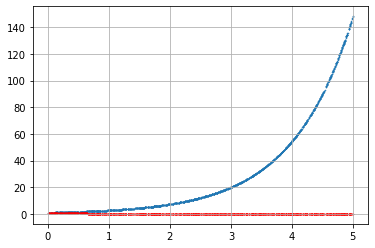

25000 Train Loss: tensor(0.2961, device='cuda:0')
times 25000 - loss: 0.29607468843460083 - y_0: tensor([[0.7139],
        [0.7139],
        [0.7139],
        ...,
        [0.7139],
        [0.7139],
        [0.7139]], device='cuda:0', grad_fn=<AddmmBackward0>)


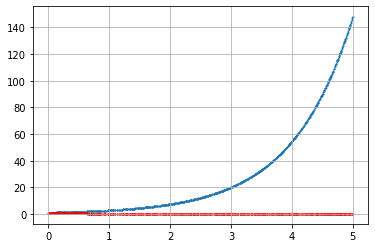

25500 Train Loss: tensor(0.2982, device='cuda:0')
times 25500 - loss: 0.29817408323287964 - y_0: tensor([[0.7163],
        [0.7163],
        [0.7163],
        ...,
        [0.7163],
        [0.7163],
        [0.7163]], device='cuda:0', grad_fn=<AddmmBackward0>)


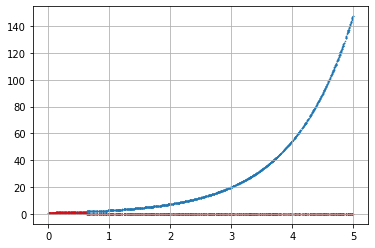

26000 Train Loss: tensor(0.2941, device='cuda:0')
times 26000 - loss: 0.2940646708011627 - y_0: tensor([[0.7061],
        [0.7061],
        [0.7061],
        ...,
        [0.7061],
        [0.7061],
        [0.7061]], device='cuda:0', grad_fn=<AddmmBackward0>)


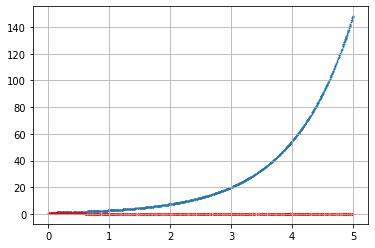

26500 Train Loss: tensor(0.2751, device='cuda:0')
times 26500 - loss: 0.27507543563842773 - y_0: tensor([[0.7196],
        [0.7196],
        [0.7196],
        ...,
        [0.7196],
        [0.7196],
        [0.7196]], device='cuda:0', grad_fn=<AddmmBackward0>)


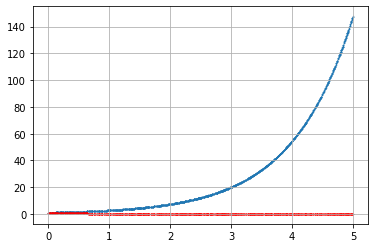

27000 Train Loss: tensor(0.2694, device='cuda:0')
times 27000 - loss: 0.2694172263145447 - y_0: tensor([[0.7092],
        [0.7092],
        [0.7092],
        ...,
        [0.7092],
        [0.7092],
        [0.7092]], device='cuda:0', grad_fn=<AddmmBackward0>)


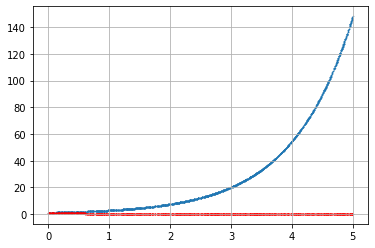

27500 Train Loss: tensor(0.2982, device='cuda:0')
times 27500 - loss: 0.29819539189338684 - y_0: tensor([[0.7206],
        [0.7206],
        [0.7206],
        ...,
        [0.7206],
        [0.7206],
        [0.7206]], device='cuda:0', grad_fn=<AddmmBackward0>)


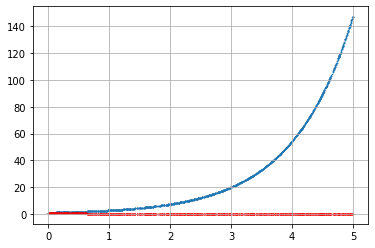

28000 Train Loss: tensor(0.2913, device='cuda:0')
times 28000 - loss: 0.29128918051719666 - y_0: tensor([[0.7071],
        [0.7071],
        [0.7071],
        ...,
        [0.7071],
        [0.7071],
        [0.7071]], device='cuda:0', grad_fn=<AddmmBackward0>)


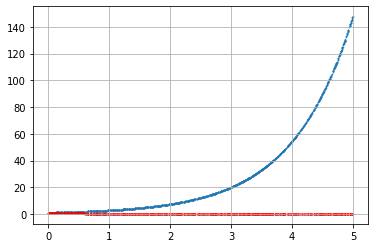

28500 Train Loss: tensor(0.2833, device='cuda:0')
times 28500 - loss: 0.28331947326660156 - y_0: tensor([[0.7152],
        [0.7152],
        [0.7152],
        ...,
        [0.7152],
        [0.7152],
        [0.7152]], device='cuda:0', grad_fn=<AddmmBackward0>)


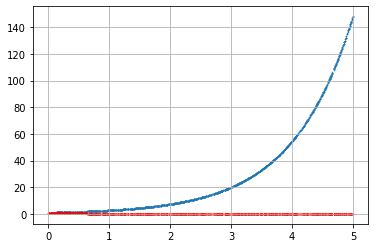

29000 Train Loss: tensor(0.3014, device='cuda:0')
times 29000 - loss: 0.30137377977371216 - y_0: tensor([[0.7240],
        [0.7240],
        [0.7240],
        ...,
        [0.7240],
        [0.7240],
        [0.7240]], device='cuda:0', grad_fn=<AddmmBackward0>)


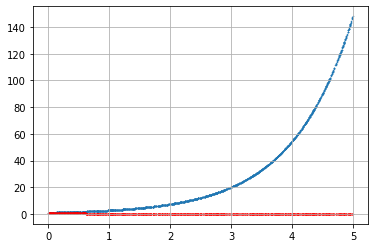

29500 Train Loss: tensor(0.2993, device='cuda:0')
times 29500 - loss: 0.29928743839263916 - y_0: tensor([[0.7073],
        [0.7073],
        [0.7073],
        ...,
        [0.7073],
        [0.7073],
        [0.7073]], device='cuda:0', grad_fn=<AddmmBackward0>)


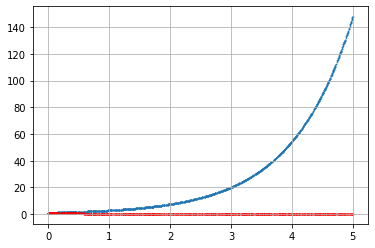

30000 Train Loss: tensor(0.2868, device='cuda:0')
times 30000 - loss: 0.2867986857891083 - y_0: tensor([[0.7156],
        [0.7156],
        [0.7156],
        ...,
        [0.7156],
        [0.7156],
        [0.7156]], device='cuda:0', grad_fn=<AddmmBackward0>)


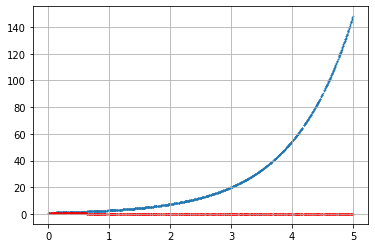

30500 Train Loss: tensor(0.2665, device='cuda:0')
times 30500 - loss: 0.2665295898914337 - y_0: tensor([[0.7130],
        [0.7130],
        [0.7130],
        ...,
        [0.7130],
        [0.7130],
        [0.7130]], device='cuda:0', grad_fn=<AddmmBackward0>)


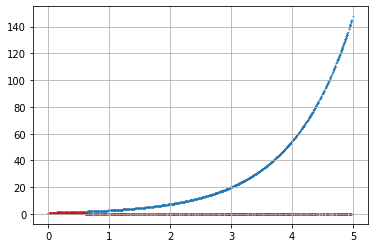

31000 Train Loss: tensor(0.2757, device='cuda:0')
times 31000 - loss: 0.2756650149822235 - y_0: tensor([[0.7250],
        [0.7250],
        [0.7250],
        ...,
        [0.7250],
        [0.7250],
        [0.7250]], device='cuda:0', grad_fn=<AddmmBackward0>)


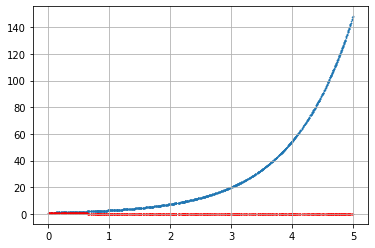

31500 Train Loss: tensor(0.2747, device='cuda:0')
times 31500 - loss: 0.2746536433696747 - y_0: tensor([[0.7265],
        [0.7265],
        [0.7265],
        ...,
        [0.7265],
        [0.7265],
        [0.7265]], device='cuda:0', grad_fn=<AddmmBackward0>)


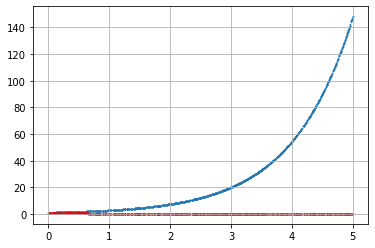

32000 Train Loss: tensor(0.2846, device='cuda:0')
times 32000 - loss: 0.28461647033691406 - y_0: tensor([[0.7180],
        [0.7180],
        [0.7180],
        ...,
        [0.7180],
        [0.7180],
        [0.7180]], device='cuda:0', grad_fn=<AddmmBackward0>)


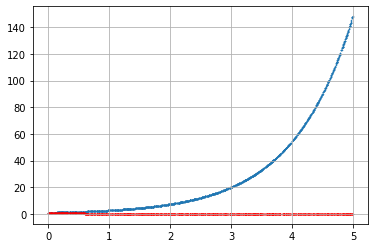

32500 Train Loss: tensor(0.2899, device='cuda:0')
times 32500 - loss: 0.28989338874816895 - y_0: tensor([[0.7082],
        [0.7082],
        [0.7082],
        ...,
        [0.7082],
        [0.7082],
        [0.7082]], device='cuda:0', grad_fn=<AddmmBackward0>)


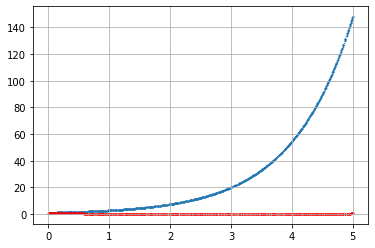

33000 Train Loss: tensor(0.2861, device='cuda:0')
times 33000 - loss: 0.2861250638961792 - y_0: tensor([[0.7151],
        [0.7151],
        [0.7151],
        ...,
        [0.7151],
        [0.7151],
        [0.7151]], device='cuda:0', grad_fn=<AddmmBackward0>)


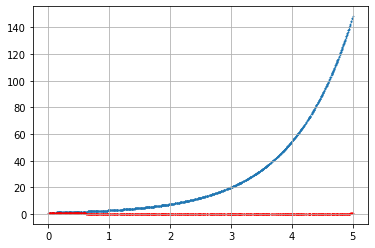

33500 Train Loss: tensor(0.2879, device='cuda:0')
times 33500 - loss: 0.2878642678260803 - y_0: tensor([[0.7225],
        [0.7225],
        [0.7225],
        ...,
        [0.7225],
        [0.7225],
        [0.7225]], device='cuda:0', grad_fn=<AddmmBackward0>)


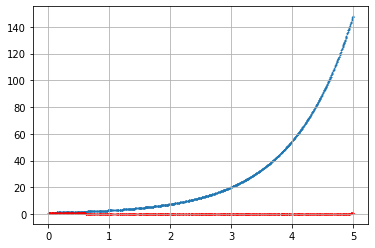

34000 Train Loss: tensor(0.2900, device='cuda:0')
times 34000 - loss: 0.2899608016014099 - y_0: tensor([[0.7180],
        [0.7180],
        [0.7180],
        ...,
        [0.7180],
        [0.7180],
        [0.7180]], device='cuda:0', grad_fn=<AddmmBackward0>)


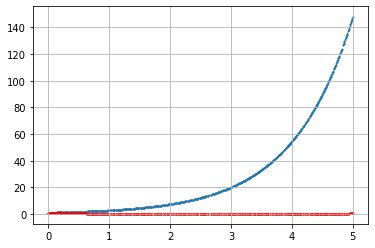

34500 Train Loss: tensor(0.2874, device='cuda:0')
times 34500 - loss: 0.2874370813369751 - y_0: tensor([[0.7233],
        [0.7233],
        [0.7233],
        ...,
        [0.7233],
        [0.7233],
        [0.7233]], device='cuda:0', grad_fn=<AddmmBackward0>)


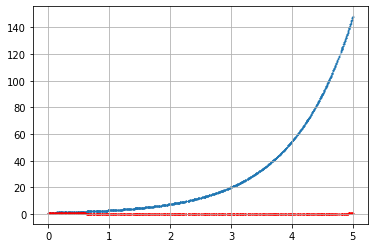

35000 Train Loss: tensor(0.2797, device='cuda:0')
times 35000 - loss: 0.2797290086746216 - y_0: tensor([[0.7141],
        [0.7141],
        [0.7141],
        ...,
        [0.7141],
        [0.7141],
        [0.7141]], device='cuda:0', grad_fn=<AddmmBackward0>)


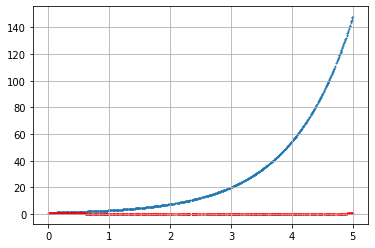

35500 Train Loss: tensor(0.2646, device='cuda:0')
times 35500 - loss: 0.26457199454307556 - y_0: tensor([[0.7179],
        [0.7179],
        [0.7179],
        ...,
        [0.7179],
        [0.7179],
        [0.7179]], device='cuda:0', grad_fn=<AddmmBackward0>)


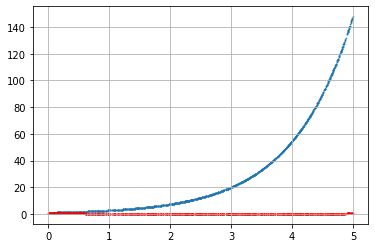

36000 Train Loss: tensor(0.2882, device='cuda:0')
times 36000 - loss: 0.28820347785949707 - y_0: tensor([[0.7126],
        [0.7126],
        [0.7126],
        ...,
        [0.7126],
        [0.7126],
        [0.7126]], device='cuda:0', grad_fn=<AddmmBackward0>)


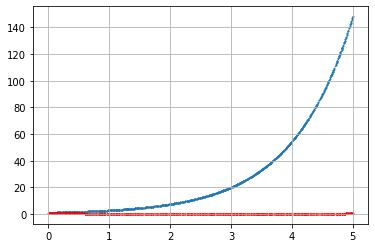

36500 Train Loss: tensor(0.2825, device='cuda:0')
times 36500 - loss: 0.28250327706336975 - y_0: tensor([[0.7153],
        [0.7153],
        [0.7153],
        ...,
        [0.7153],
        [0.7153],
        [0.7153]], device='cuda:0', grad_fn=<AddmmBackward0>)


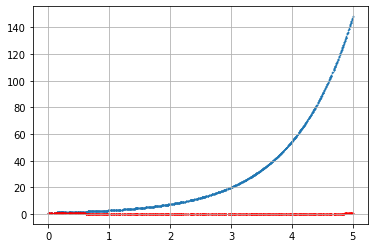

37000 Train Loss: tensor(0.2858, device='cuda:0')
times 37000 - loss: 0.2858157753944397 - y_0: tensor([[0.7116],
        [0.7116],
        [0.7116],
        ...,
        [0.7116],
        [0.7116],
        [0.7116]], device='cuda:0', grad_fn=<AddmmBackward0>)


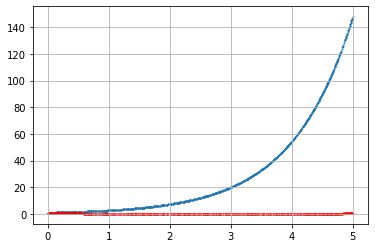

37500 Train Loss: tensor(0.2906, device='cuda:0')
times 37500 - loss: 0.29064470529556274 - y_0: tensor([[0.7215],
        [0.7215],
        [0.7215],
        ...,
        [0.7215],
        [0.7215],
        [0.7215]], device='cuda:0', grad_fn=<AddmmBackward0>)


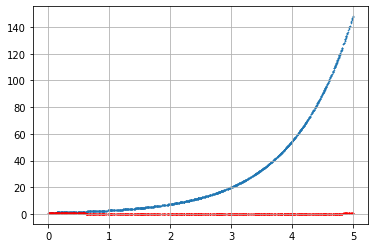

38000 Train Loss: tensor(0.2901, device='cuda:0')
times 38000 - loss: 0.2900536060333252 - y_0: tensor([[0.7250],
        [0.7250],
        [0.7250],
        ...,
        [0.7250],
        [0.7250],
        [0.7250]], device='cuda:0', grad_fn=<AddmmBackward0>)


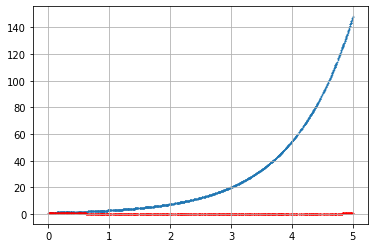

38500 Train Loss: tensor(0.2823, device='cuda:0')
times 38500 - loss: 0.2823184132575989 - y_0: tensor([[0.7146],
        [0.7146],
        [0.7146],
        ...,
        [0.7146],
        [0.7146],
        [0.7146]], device='cuda:0', grad_fn=<AddmmBackward0>)


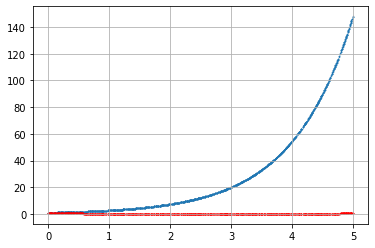

39000 Train Loss: tensor(0.2751, device='cuda:0')
times 39000 - loss: 0.275136262178421 - y_0: tensor([[0.7172],
        [0.7172],
        [0.7172],
        ...,
        [0.7172],
        [0.7172],
        [0.7172]], device='cuda:0', grad_fn=<AddmmBackward0>)


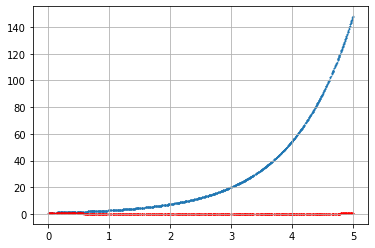

39500 Train Loss: tensor(0.2782, device='cuda:0')
times 39500 - loss: 0.27824097871780396 - y_0: tensor([[0.7062],
        [0.7062],
        [0.7062],
        ...,
        [0.7062],
        [0.7062],
        [0.7062]], device='cuda:0', grad_fn=<AddmmBackward0>)


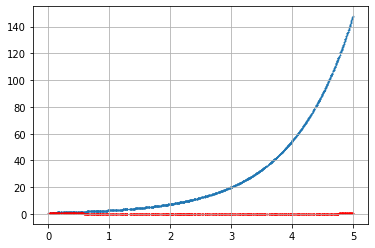

40000 Train Loss: tensor(0.2901, device='cuda:0')
times 40000 - loss: 0.29009079933166504 - y_0: tensor([[0.7069],
        [0.7069],
        [0.7069],
        ...,
        [0.7069],
        [0.7069],
        [0.7069]], device='cuda:0', grad_fn=<AddmmBackward0>)


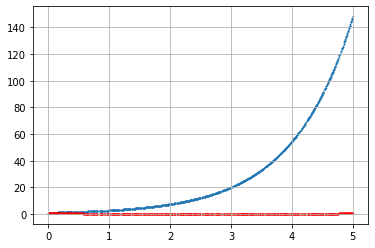

40500 Train Loss: tensor(0.2972, device='cuda:0')
times 40500 - loss: 0.29721081256866455 - y_0: tensor([[0.7150],
        [0.7150],
        [0.7150],
        ...,
        [0.7150],
        [0.7150],
        [0.7150]], device='cuda:0', grad_fn=<AddmmBackward0>)


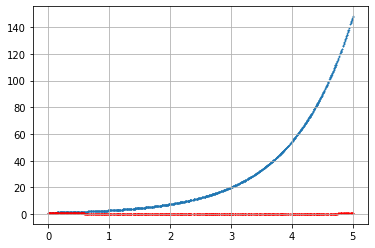

41000 Train Loss: tensor(0.2881, device='cuda:0')
times 41000 - loss: 0.28811585903167725 - y_0: tensor([[0.7206],
        [0.7206],
        [0.7206],
        ...,
        [0.7206],
        [0.7206],
        [0.7206]], device='cuda:0', grad_fn=<AddmmBackward0>)


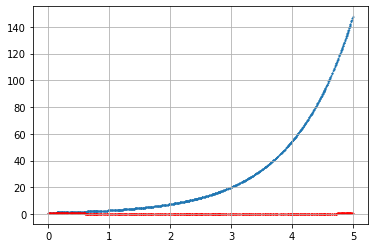

41500 Train Loss: tensor(0.2856, device='cuda:0')
times 41500 - loss: 0.2855689525604248 - y_0: tensor([[0.7179],
        [0.7179],
        [0.7179],
        ...,
        [0.7179],
        [0.7179],
        [0.7179]], device='cuda:0', grad_fn=<AddmmBackward0>)


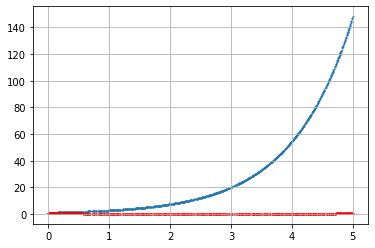

42000 Train Loss: tensor(0.2730, device='cuda:0')
times 42000 - loss: 0.27295488119125366 - y_0: tensor([[0.7143],
        [0.7143],
        [0.7143],
        ...,
        [0.7143],
        [0.7143],
        [0.7143]], device='cuda:0', grad_fn=<AddmmBackward0>)


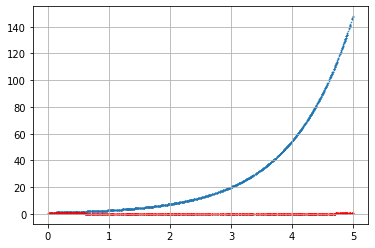

42500 Train Loss: tensor(0.2961, device='cuda:0')
times 42500 - loss: 0.2961169481277466 - y_0: tensor([[0.7232],
        [0.7232],
        [0.7232],
        ...,
        [0.7232],
        [0.7232],
        [0.7232]], device='cuda:0', grad_fn=<AddmmBackward0>)


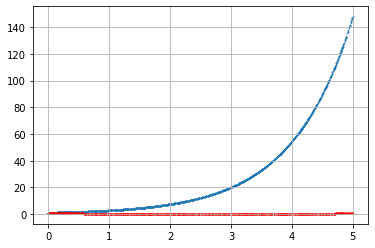

43000 Train Loss: tensor(0.2788, device='cuda:0')
times 43000 - loss: 0.2787736654281616 - y_0: tensor([[0.7194],
        [0.7194],
        [0.7194],
        ...,
        [0.7194],
        [0.7194],
        [0.7194]], device='cuda:0', grad_fn=<AddmmBackward0>)


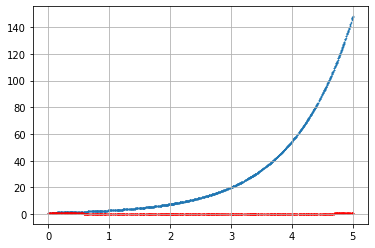

43500 Train Loss: tensor(0.2811, device='cuda:0')
times 43500 - loss: 0.2811170518398285 - y_0: tensor([[0.7138],
        [0.7138],
        [0.7138],
        ...,
        [0.7138],
        [0.7138],
        [0.7138]], device='cuda:0', grad_fn=<AddmmBackward0>)


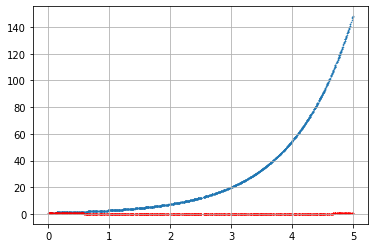

44000 Train Loss: tensor(0.2698, device='cuda:0')
times 44000 - loss: 0.26983046531677246 - y_0: tensor([[0.7053],
        [0.7053],
        [0.7053],
        ...,
        [0.7053],
        [0.7053],
        [0.7053]], device='cuda:0', grad_fn=<AddmmBackward0>)


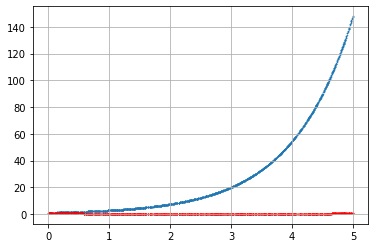

44500 Train Loss: tensor(0.2810, device='cuda:0')
times 44500 - loss: 0.28101980686187744 - y_0: tensor([[0.7166],
        [0.7166],
        [0.7166],
        ...,
        [0.7166],
        [0.7166],
        [0.7166]], device='cuda:0', grad_fn=<AddmmBackward0>)


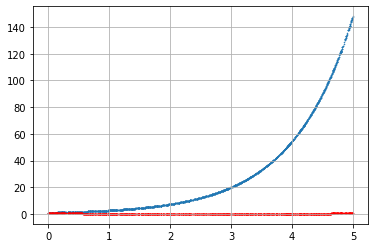

45000 Train Loss: tensor(0.2882, device='cuda:0')
times 45000 - loss: 0.28818535804748535 - y_0: tensor([[0.7126],
        [0.7126],
        [0.7126],
        ...,
        [0.7126],
        [0.7126],
        [0.7126]], device='cuda:0', grad_fn=<AddmmBackward0>)


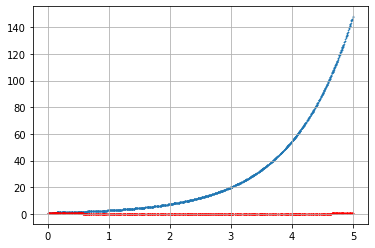

45500 Train Loss: tensor(0.2835, device='cuda:0')
times 45500 - loss: 0.28347235918045044 - y_0: tensor([[0.7142],
        [0.7142],
        [0.7142],
        ...,
        [0.7142],
        [0.7142],
        [0.7142]], device='cuda:0', grad_fn=<AddmmBackward0>)


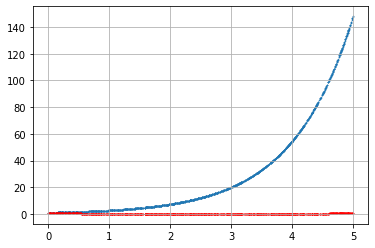

46000 Train Loss: tensor(0.2759, device='cuda:0')
times 46000 - loss: 0.2758640646934509 - y_0: tensor([[0.7131],
        [0.7131],
        [0.7131],
        ...,
        [0.7131],
        [0.7131],
        [0.7131]], device='cuda:0', grad_fn=<AddmmBackward0>)


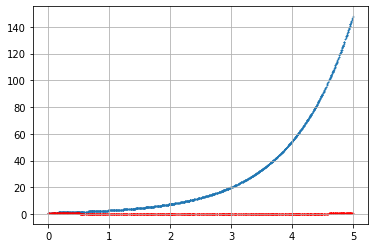

46500 Train Loss: tensor(0.2836, device='cuda:0')
times 46500 - loss: 0.2835657596588135 - y_0: tensor([[0.7153],
        [0.7153],
        [0.7153],
        ...,
        [0.7153],
        [0.7153],
        [0.7153]], device='cuda:0', grad_fn=<AddmmBackward0>)


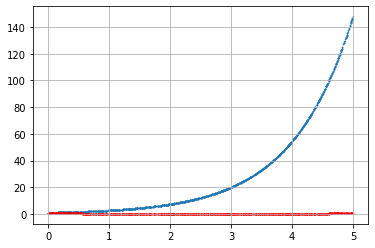

47000 Train Loss: tensor(0.2919, device='cuda:0')
times 47000 - loss: 0.2918579876422882 - y_0: tensor([[0.7066],
        [0.7066],
        [0.7066],
        ...,
        [0.7066],
        [0.7066],
        [0.7066]], device='cuda:0', grad_fn=<AddmmBackward0>)


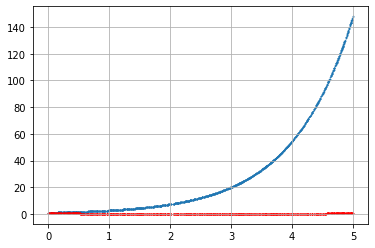

47500 Train Loss: tensor(0.2765, device='cuda:0')
times 47500 - loss: 0.27646252512931824 - y_0: tensor([[0.7202],
        [0.7202],
        [0.7202],
        ...,
        [0.7202],
        [0.7202],
        [0.7202]], device='cuda:0', grad_fn=<AddmmBackward0>)


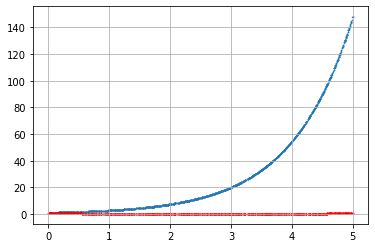

48000 Train Loss: tensor(0.2853, device='cuda:0')
times 48000 - loss: 0.28533247113227844 - y_0: tensor([[0.7280],
        [0.7280],
        [0.7280],
        ...,
        [0.7280],
        [0.7280],
        [0.7280]], device='cuda:0', grad_fn=<AddmmBackward0>)


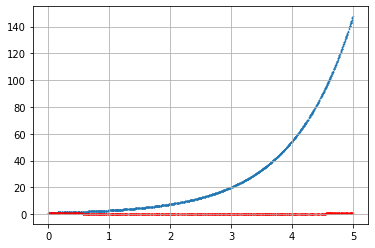

48500 Train Loss: tensor(0.2875, device='cuda:0')
times 48500 - loss: 0.28749608993530273 - y_0: tensor([[0.7070],
        [0.7070],
        [0.7070],
        ...,
        [0.7070],
        [0.7070],
        [0.7070]], device='cuda:0', grad_fn=<AddmmBackward0>)


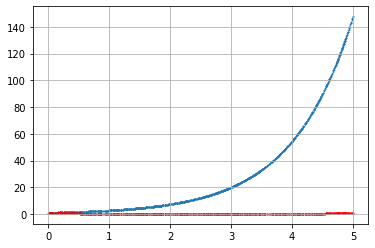

49000 Train Loss: tensor(0.2981, device='cuda:0')
times 49000 - loss: 0.29810160398483276 - y_0: tensor([[0.7210],
        [0.7210],
        [0.7210],
        ...,
        [0.7210],
        [0.7210],
        [0.7210]], device='cuda:0', grad_fn=<AddmmBackward0>)


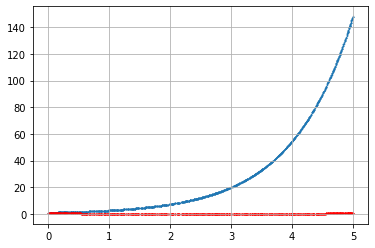

49500 Train Loss: tensor(0.2894, device='cuda:0')
times 49500 - loss: 0.28943687677383423 - y_0: tensor([[0.7159],
        [0.7159],
        [0.7159],
        ...,
        [0.7159],
        [0.7159],
        [0.7159]], device='cuda:0', grad_fn=<AddmmBackward0>)


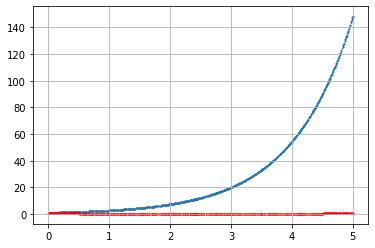

50000 Train Loss: tensor(0.2890, device='cuda:0')
times 50000 - loss: 0.28896933794021606 - y_0: tensor([[0.7134],
        [0.7134],
        [0.7134],
        ...,
        [0.7134],
        [0.7134],
        [0.7134]], device='cuda:0', grad_fn=<AddmmBackward0>)


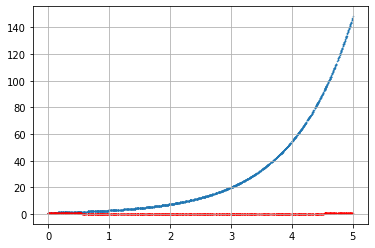

In [58]:
for epoch in range(epochs + 1):
    
    optimizer.zero_grad()
    
    # 边界条件的损失函数
    x_0 = torch.zeros(2000, 1).to(device)
    y_0 = net(x_0).to(device)
    mse_i = loss_fn(y_0, torch.ones(2000, 1).to(device))
    
    #方程的损失函数
    x_in = np.random.uniform(low=0., high=5., size=(2000, 1))
    pt_x_in = torch.autograd.Variable(torch.from_numpy(x_in).float(), requires_grad=True).to(device)
    pt_y_colection = ode_e_x(pt_x_in, net).to(device)
    pt_all_zeros = torch.autograd.Variable(torch.from_numpy(np.zeros((2000, 1))).float(), requires_grad=False)
    mse_f = loss_fn(pt_y_colection, pt_all_zeros.to(device))
    
    loss = mse_i + mse_f
    loss.backward()
    optimizer.step()
    
    if epoch%500 == 0:
        y = torch.exp(pt_x_in)
        y_pred = net(pt_x_in)
        print(epoch, "Train Loss:", loss.data)
        print(f'times {epoch} - loss: {loss.item()} - y_0: {y_0}')
        plt.cla()
        plt.grid()
        plt.scatter(pt_x_in.cpu().detach().numpy(), y.cpu().detach().numpy(), s=0.3)
        plt.scatter(pt_x_in.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), c='r', s=0.3)
        plt.pause(0.1)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import autograd

"""
用神经网络模拟微分方程,f(x)'=f(x),初始条件f(0) = 1
"""

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self, NL, NN): # NL n个l（线性，全连接）隐藏层， NN 输入数据的维数，
        # NL是有多少层隐藏层
        # NN是每层的神经元数量
        super(Net, self).__init__()
        self.input_layer = nn.Linear(1, NN)
        self.hidden_layer = nn.Linear(NN,int(NN/2)) ## 原文这里用NN，我这里用的下采样，经过实验验证，“等采样”更优。更多情况有待我实验验证。
        self.output_layer = nn.Linear(int(NN/2), 1)

    def forward(self, x):
        out = torch.tanh(self.input_layer(x))
        out = torch.tanh(self.hidden_layer(out))
        out_final = self.output_layer(out)
        return out_final


net=Net(4,20).to(device) # 4层 20个
mse_cost_function = torch.nn.MSELoss(reduction='mean').to(device) # Mean squared error 均方误差求
optimizer = torch.optim.Adam(net.parameters(),lr=1e-4)  # 优化器

def ode_01(x,net):
    y=net(x)
    y_x = autograd.grad(y, x,grad_outputs=torch.ones_like(net(x)),create_graph=True)[0]
    return y-y_x   # y-y' = 0

# requires_grad=True).unsqueeze(-1)

plt.ion()  # 动态图
iterations=20000
for epoch in range(iterations):

    optimizer.zero_grad()  # 梯度归0

    ## 求边界条件的损失函数
    x_0 = torch.zeros(2000, 1).to(device)
    y_0 = net(x_0).to(device)
    mse_i = mse_cost_function(y_0, torch.ones(2000, 1).to(device))  # f(0) - 1 = 0

    ## 方程的损失函数
    x_in = np.random.uniform(low=0.0, high=2.0, size=(2000, 1))
    pt_x_in = autograd.Variable(torch.from_numpy(x_in).float(), requires_grad=True).to(device)  # x 随机数
    pt_y_colection=ode_01(pt_x_in,net).to(device)
    pt_all_zeros= autograd.Variable(torch.from_numpy(np.zeros((2000,1))).float(), requires_grad=False)
    mse_f=mse_cost_function(pt_y_colection, pt_all_zeros.to(device))  # y-y' = 0

    loss = mse_i + mse_f
    loss.backward()  # 反向传播
    optimizer.step()  # 优化下一步。This is equivalent to : theta_new = theta_old - alpha * derivative of J w.r.t theta

    if epoch%1000==0:
            y = torch.exp(pt_x_in)  # y 真实值
            y_train0 = net(pt_x_in) # y 预测值
            print(epoch, "Traning Loss:", loss.data)
            print(f'times {epoch}  -  loss: {loss.item()} - y_0: {y_0}')
            plt.figure(facecolor='white')
            plt.cla()
            plt.grid()
            title = "epoch:" + str(epoch)
            plt.title(title, loc='left')
            plt.scatter(pt_x_in.cpu().detach().numpy(), y.cpu().detach().numpy(), s=0.4)
            plt.scatter(pt_x_in.cpu().detach().numpy(), y_train0.cpu().detach().numpy(),c='red', s=0.4)
            plt.savefig("png" + '/ts' + str(epoch) + '.png')
            plt.show()
            plt.pause(0.1)